# Quick Overview

Here you can find some quick examples of what you can do with segysak. For more details refer to the [examples](../examples.html).

The library is imported as *segysak* and the loaded `xarray` objects are compatible with *numpy* and *matplotlib*.

The cropped volume from the Volve field in the North Sea (made available by Equinor) is used for this example, and
all the examples and data in this documentation are available from the `examples` folder of the
[Github](https://github.com/trhallam/segysak) respository.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import pathlib

In [3]:


V3D_path = pathlib.Path('../data/Bindiar_seismic/20161428_Bindiar_Rd_PSTKMIG_depth_3km@2m_datum_55m.sgy')
print("3D", V3D_path, V3D_path.exists())

3D ..\data\Bindiar_seismic\20161428_Bindiar_Rd_PSTKMIG_depth_3km@2m_datum_55m.sgy True


## Scan SEG-Y headers


A basic operation would be to check the text header included in the SEG-Y file. The *get_segy_texthead*
function accounts for common encoding issues and returns the header as a text string.

In [4]:
from segysak.segy import get_segy_texthead

get_segy_texthead(V3D_path)

Text HeaderC01 CLIENT:   COMPANY: Curtin
C02 PROJECT:   AREA: 2016_bindiar_r  LINE: 0010_lin02
C03 CREATION DATE: Thu Apr 28 18:55:02 2016
C04 FORMAT: IBM FLOATING POINT BYTES/SAMPLE: 4 FIXED LENGTH
C05 TRACE HEADER LENGTH: 240 DATA POLARITY: UNKNOWN
C06 DATA TYPE: POSTSTACK SEISMIC  PRIMARY SORT ORDER: CDP BIN
C07 MAXIMUM NUMBER OF TRACES PER ENSEMBLE: 1
C08 SAMPLE INTERVAL: 2.000000 MS  OUTPUT DATA LENGTH: 3002 MS
C09 UNITS OF MEASURE: METRIC  DATA DOMAIN: DEPTH-SPACE
C10 FINAL PROCESSING DATUM: 55  FINAL REPLACEMENT VELOCITY: 2500
C11 X REFERENCE COORDINATE: 0  Y REFERENCE COORDINATE: 0
C12 3D GRID ORIGIN: X COORDINATE: NOT DEFINED  Y COORDINATE: NOT DEFINED
C13 3D FIRST INLINE: X COORDINATE: NOT DEFINED  Y COORDINATE: NOT DEFINED
C14 INLINE NUMBER: MIN: NOT DEFINED  MAX: NOT DEFINED  TOTAL: NOT DEFINED
C15 3D FIRST CROSSLINE: X COORDINATE: NOT DEFINED  Y COORDINATE: NOT DEFINED
C16 CROSSLINE NUMBER: MIN: NOT DEFINED  MAX: NOT DEFINED  TOTAL: NOT DEFINED
C17 SURFACE LOCATION: MIN: 1  MAX: 694  INCREMENT: 1
C18 MIN CDP: 0  MAX CDP: 1386  CDP INCREMENT: 1
C19 TOTAL NUMBER OF CDPS: 1383  MAXIMUM CDP FOLD: 630
C20 SOURCE INDEX: MINIMUM: 1  MAXIMUM: 1  INCREMENT: 1
C21 OFFSET BIN NUMBER: MIN: 1  MAX: 1  INCREMENT: 1
C22 OFFSET BIN: TOTAL: 64 INCREMENT DIST: 100.000000  FAR OFFSET: 6344.223145
C23 CHANNEL NUMBER: MIN: 1 MAX: 694  TOTAL SURF LOCATIONS: 694
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38
C39
C40 EOF. . . Created by: ProMAX 5000.8.4.0  Landmark Graphics, a Halliburton Com

If you need to investigate the trace header data more deeply, then *segy_header_scan* can be used to report
basic statistics of each byte position for a limited number of traces.

*segy_header_scan* returns a `pandas.DataFrame`. To see the full DataFrame use the `pandas` option_context manager.

In [5]:
from segysak.segy import segy_header_scan

scan = segy_header_scan(V3D_path)
scan

  0%|          | 0.00/691 [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,691.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
TRACE_SEQUENCE_FILE,5,691.0,346.000000,199.618803,1.0,173.5,346.0,518.5,691.0
FieldRecord,9,691.0,979.635311,438.689148,8.0,628.0,1206.0,1348.0,1406.0
TraceNumber,13,691.0,496.332851,251.144215,1.0,296.0,679.0,694.0,694.0
EnergySourcePoint,17,691.0,978.635311,438.689148,7.0,627.0,1205.0,1347.0,1405.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,691.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
SourceEnergyDirectionExponent,223,691.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
SourceMeasurementMantissa,225,691.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
SourceMeasurementExponent,229,691.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


The header report can also be reduced by filtering blank byte locations. Here we use the standard deviation `std`
to filter away blank values which can help us to understand the composition of the data.

For instance, key values like **trace UTM coordinates** are located in bytes *73* for X & *77* for Y. We
can also see the byte positions of the **local grid** for INLINE_3D in byte *189* and for CROSSLINE_3D in byte *193*.

In [6]:
scan[scan["std"] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_FILE,5,691.0,3.460000e+02,199.618803,1.0,173.5,346.0,518.5,691.0
FieldRecord,9,691.0,9.796353e+02,438.689148,8.0,628.0,1206.0,1348.0,1406.0
TraceNumber,13,691.0,4.963329e+02,251.144215,1.0,296.0,679.0,694.0,694.0
EnergySourcePoint,17,691.0,9.786353e+02,438.689148,7.0,627.0,1205.0,1347.0,1405.0
CDP,21,691.0,6.940000e+02,399.237607,4.0,349.0,694.0,1039.0,1384.0
NStackedTraces,33,691.0,2.997106e+00,0.053760,2.0,3.0,3.0,3.0,3.0
offset,37,691.0,1.594491e+03,876.471181,-25.0,831.5,1663.0,2341.0,3058.0
ReceiverGroupElevation,41,691.0,4.283647e+01,8.170867,18.0,44.0,44.0,45.5,61.0
SourceSurfaceElevation,45,691.0,3.516208e+01,12.496251,18.0,24.0,29.0,47.0,61.0
SourceX,73,691.0,3.717035e+05,14278.772768,0.0,370690.5,372243.0,373809.0,375288.0


To retreive the raw header content use `segy_header_scrape`. Setting `partial_scan=None` will return the
full dataframe of trace header information.

In [7]:
from segysak.segy import segy_header_scrape

scrape = segy_header_scrape(V3D_path, partial_scan=1000)
scrape

  0%|          | 0.00/691 [00:00<?, ? traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,0,1,1348,1,1347,4,0,12,0,2,...,0,0,0,1,0,0,0,0,0,0
1,0,2,1348,4,1347,6,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0
2,0,3,1348,5,1347,8,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0
3,0,4,1348,8,1347,10,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0
4,0,5,1368,3,1367,12,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,0,687,24,694,23,1376,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0
687,0,688,20,694,19,1378,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0
688,0,689,16,694,15,1380,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0
689,0,690,8,693,7,1382,0,12,0,3,...,0,0,0,1,0,0,0,0,0,0


## Load SEG-Y data

All SEG-Y (2D, 2D gathers, 3D & 3D gathers) are ingested into `xarray.Dataset` objects through the
`segy_loader` function. It is best to be explicit about the byte locations of key information but
`segy_loader` can attempt to guess the shape of your dataset. Some standard byte positions are
defined in the `well_known_bytes` function and others can be added via pull requests to the Github
repository if desired.

In [8]:
from segysak.segy import segy_loader, well_known_byte_locs

V3D = segy_loader(V3D_path, iline=189, xline=193, cdpx=73, cdpy=77, vert_domain="TWT")
V3D

  0%|          | 0.00/691 [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/691 [00:00<?, ? traces/s]

ValueError: cannot convert a DataFrame with a non-unique MultiIndex into xarray

## Visualising data

`xarray` objects use smart label based indexing techniques to retreive subsets of data. More
details on `xarray` techniques for *segysak* are covered in the examples, but this demonstrates
a general syntax for selecting data by label with `xarray`. Plotting is done by `matploblib` and
`xarray` selections can be passed to normal `matplotlib.pyplot` functions.

NameError: name 'V3D' is not defined

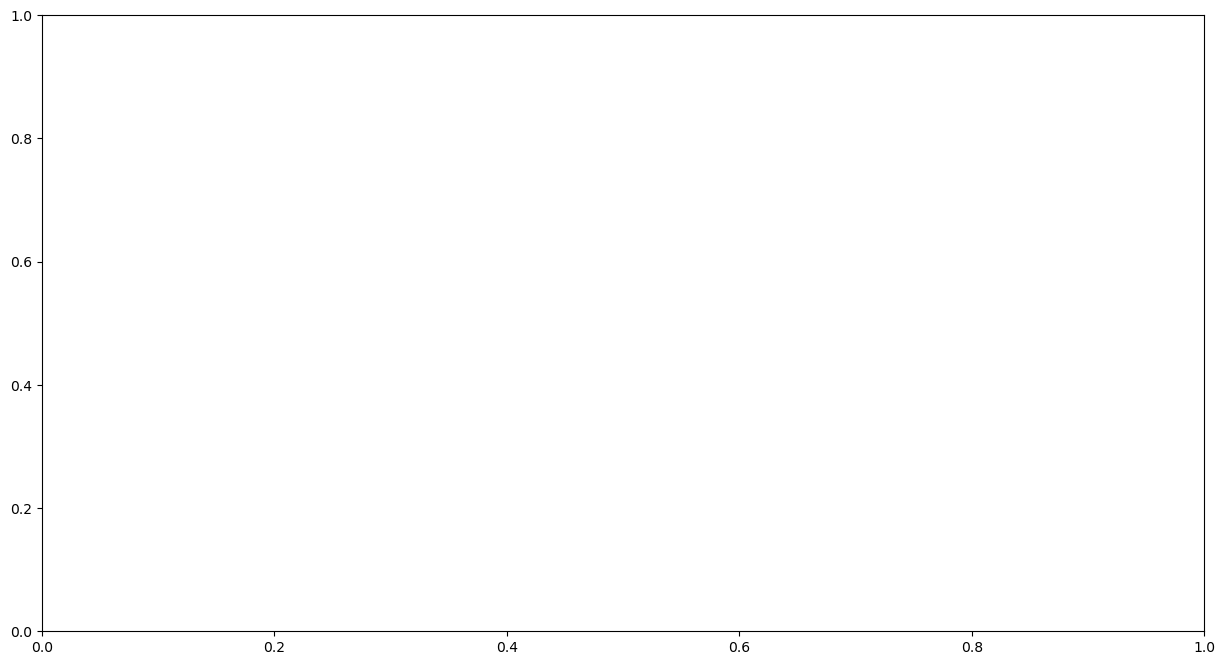

In [9]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 10093
V3D.data.transpose("twt", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

## Saving data to NetCDF4

SEGYSAK offers a convenience utility to make saving to NetCDF4 simple. This is accesssed through the `seisio` accessor on the loaded
SEG-Y or SEISNC volume. The `to_netcdf` method accepts the same arguments as the `xarray` version.

In [10]:
V3D.seisio.to_netcdf("V3D.SEISNC")

## Saving data to SEG-Y

To return data to SEG-Y after modification use the `segy_writer` function. `segy_writer` takes as argument a SEISNC dataset which
requires certain attributes be set. You can also specify the byte locations to write header information.

In [11]:
from segysak.segy import segy_writer

segy_writer(
    V3D, "V3D.segy", trace_header_map=dict(iline=5, xline=21)
)  # Petrel Locations

Writing to SEG-Y: 100%|██████████| 12322/12322 [00:00<00:00, 26033.52 traces/s]
